센서: 8×8 열 적외선 온도 센서 (총 64개 픽셀)

픽셀 인덱스: (0, 0) ~ (7, 7)

센서 위치:

높이: 3.7m

평면 상 위치: (0, 7) 방향 (방 우측 상단 모서리)

아래쪽으로 45도, 왼쪽으로 45도 기울어 있음

센서 감지 거리 (FOV 길이): 7m

센서 시야각 (FOV): 90도

회전 행렬 (Rx: 아래로 45도, Ry: 왼쪽으로 45도) 생성

각 픽셀의 중앙 방향 벡터 계산

해당 방향으로 거리 7m 연장 후, 지면(z=0)과 만나는 지점 계산

64개 픽셀에 대해 반복 후, 평면(x, y) 위에 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# 센서 위치 (예: 높이 1m, 오른쪽 끝 (1, 1, 1))
sensor_pos = np.array([3.7, 1.0, 1.0])

In [2]:
def deg2rad(deg):
    return deg * np.pi / 180

In [3]:
# 회전 행렬 정의
def get_rotation_matrix(pitch_deg, yaw_deg):
    pitch = deg2rad(pitch_deg)
    yaw = deg2rad(yaw_deg)

    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(pitch), -np.sin(pitch)],
        [0, np.sin(pitch),  np.cos(pitch)]
    ])

    Rz = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw),  np.cos(yaw), 0],
        [0, 0, 1]
    ])

    return Rz @ Rx

In [4]:
# 설정
pixels = 8
fov_per_pixel = 90 / pixels  # 11.25도
center = (pixels - 1) / 2

rotation_matrix = get_rotation_matrix(pitch_deg=-45, yaw_deg=-45)

intersection_points = []
labels = []

for i in range(pixels):
    for j in range(pixels):
        x_angle = (j - center) * fov_per_pixel
        y_angle = (i - center) * fov_per_pixel

        # 기본 방향
        direction = np.array([
            np.tan(deg2rad(x_angle)),
            np.tan(deg2rad(y_angle)),
            1.0
        ])
        direction = direction / np.linalg.norm(direction)

        # 회전 적용
        dir_rot = rotation_matrix @ direction

        # z=0 평면과 교차 계산 (z(t) = dir_rot[2] * t = 0 ⇒ t = 0 if z=0)
        # 원점에서 출발한 벡터가 z=0과 만나는 t 계산
        if dir_rot[2] <= 0:
            # 벡터가 아래를 향할 때만 교차함
            t = -0 / dir_rot[2]  # 예외 방지용
            t = -1.0 / dir_rot[2]
            point = dir_rot * t
            intersection_points.append(point)
            labels.append(f"({i},{j})")

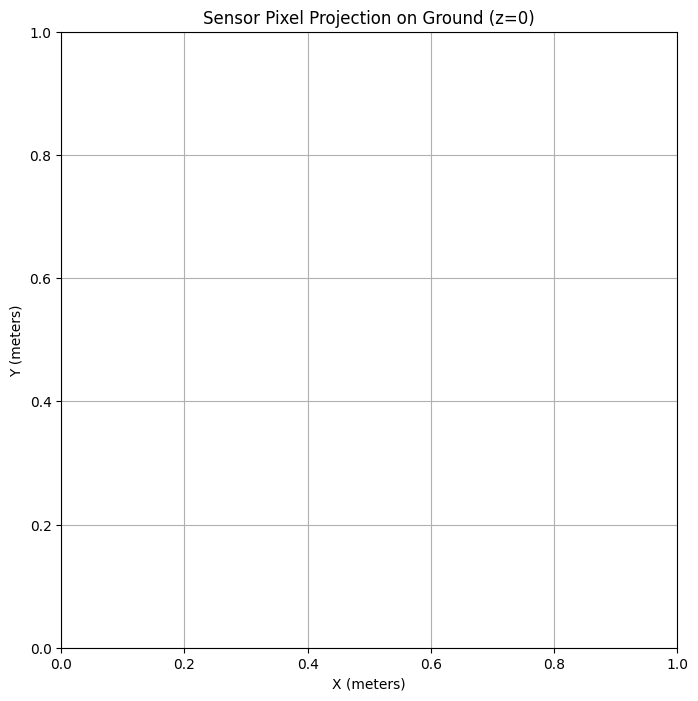

In [5]:
# 시각화
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

for pt, label in zip(intersection_points, labels):
    ax.scatter(pt[0], pt[1], c='r')
    ax.text(pt[0], pt[1], label, fontsize=7, color='blue')

ax.set_title("Sensor Pixel Projection on Ground (z=0)")
ax.set_xlabel("X (meters)")
ax.set_ylabel("Y (meters)")
ax.set_aspect('equal')
plt.grid(True)
plt.show()